<a href="https://colab.research.google.com/github/RachelRamirez/misclassification_matrix/blob/main/Analyzing_Exp_5Bins_11Runs_40D_with_SGD_LR_0point1_DiffInitSeedsperRep_plus_Baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')
mydrive_path = "/content/drive/MyDrive/Con3/Exp_5bins_11Runs_40D_SGD_Lr0point1_diffSeedsPerRep"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#@title
# How to change the local time in Google Colab
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/US/Eastern /etc/localtime
!date

#If this doesn't show the local time correctly, then you need to restart.
import time
time.localtime(time.time())

import datetime

# get current date and time
now = datetime.datetime.now()

Thu 11 May 2023 12:12:09 PM EDT


We'll start by writing a `.py` file which we'll import.

In [68]:
#@title
# import ImportLibraries_DefineFunctions
import requests
url = 'https://raw.githubusercontent.com/RachelRamirez/misclassification_matrix/main/ImportLibraries_DefineFunctions.py'
r = requests.get(url)


# make sure your filename is the same as how you want to import 
with open('ImportLibraries_DefineFunctions.py', 'w') as f:
    f.write(r.text)

# now we can import


In [69]:
#@title
# #@title
# # Bring the file into the local Python environment.
execfile('ImportLibraries_DefineFunctions.py')

# Call the function defined in the file.
# f()
time.localtime(time.time())

TF version:  2.12.0
Keras version:  2.12.0
Finished Loading Libraries
60000 train samples
7500 validation samples
2500 test samples
Train [0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751666 0.09915   ]
Train # of 9s 5949.0
Train # of 4s 5842.0
Val [0.09586667 0.1132     0.10453334 0.10066666 0.09986667 0.09013333
 0.09413333 0.1016     0.09746667 0.10253333]
Val # of 9s 769.0
Val # of 4s 749.0
Test [0.1044 0.1144 0.0992 0.102  0.0932 0.0864 0.1008 0.1064 0.0972 0.096 ]
Test  # of 9s 240.0
Test  # of 4s 233.0


time.struct_time(tm_year=2023, tm_mon=5, tm_mday=11, tm_hour=12, tm_min=12, tm_sec=10, tm_wday=3, tm_yday=131, tm_isdst=1)

In [47]:
#@title
# #As of 4/18 I am changing this code to save weights initially after five epochs using lambdavalue=1 initially

# rms = RMSprop()  #https://keras.io/api/optimizers/rmsprop/ #default learning_rate=0.001
sgd = SGD(learning_rate=0.1)

patience = 0


# SET THE IITIAL LAMBDA VALUE! 
cost_matrix = np.ones((10,10))
lambda_val = 1

Truth=9
Predicted=4
cost_matrix[Truth, Predicted] = lambda_val


# # Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix, )
# cr_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_classification_report, )
# es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights = True)





# ## Examples from TDS
# from tensorflow.keras.callbacks import LambdaCallback
# epoch_callback = LambdaCallback(
#     on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1))
# )
# batch_loss_callback = LambdaCallback(
#     on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
# )
# train_finish_callback = LambdaCallback(
#     on_train_end=lambda logs: print('Training finished!')
# )

# # Lambda function using if else & else if
# min = lambda a, b, c : f"{a} is smaller" if(a < b & b < c) \
#      else f"{b} is smaller"  if (b < c) else f"{c} is smaller" 
# print(min(40, 30, 10))

epoch_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end = lambda epoch,logs: 
                                                   print(' Epoch {} complete {}...'.format(epoch+1), end=" ")  if(epoch+1)%10==0 else print("", end=" ")  )


# cr_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end= lambda epoch, logs:
# #                                                log_classification_report(epoch, logs) if(epoch+1)%5==0 else print(" ") )
#                                               #  return_cr if(epoch+1)%5==0 else print(" ") )


f1_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_f1_score)


# model = create_model()

# # save the model weights
# model.save_weights('initial_0epochs.h5')

# model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)

# model_history = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=10, verbose=2,
# #         validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])

# model.save_weights('initial_10epochs.h5')

 
# cr = return_cr(model)
!date


Thu 11 May 2023 12:11:54 PM EDT


In [48]:
# model.load_weights('initial_10epochs.h5') 


The code below to generate variations of the model training / validation results after training with a cost matrix 30 times did not produce any variability.   Therefore I want to shuffle the training/validation deck randomly between training sessions to see if that helps introduce some randomness.  

#### The Training Runs - Commented out to ensure not run again when the notebook is saved with output

This takes hours to run for about 40 replications so usually after running, I save the out put to GitHub for easy lookup later

In [49]:
# #@title
# from google.colab import files

# ## -----------------------------------------------------------------------------------------------------
# ## Now we need to load the weights of the model, and continue training with a different cost matrix
# ## ------------------------------------------------------------------------------------------------------
# # load the model weights
# # model.load_weights('initial_5epochs.h5') 

# df = pd.DataFrame()
# cost_matrix = np.ones((10,10))

# model_history_all = []
# cm_all            = []

# cost_list = [10, 100, 1000] # Each one takes about 2 minutes 5*4*2=40 minutes for 5 costs/4 reps -- actually all took 40 reps took almost  1.5 hours
# reps = 1

# for k in cost_list:
#   for r in range(reps):
#     print("starting rep ", i, " for ", k , "-cost.")

#     cost_matrix[9,4] = k
#     model = create_model(r)

#     model.load_weights('initial_0epochs.h5')

#     #I may need to re-initiate the optimizer to have a smaller learning rate
#     model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)
    
#     nb_epoch = 110
#     # patience = 20

#     # es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights = True)

#     X_train_shuffled = shuffle(X_train, random_state=42 + r )
#     Y_train_shuffled = shuffle(Y_train, random_state=42 + r)
 

#     history = model.fit(X_train_shuffled, Y_train_shuffled,          batch_size=batch_size, epochs=nb_epoch, verbose=0,
#             validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback, epoch_callback])

#     cm3 = return_cm(model)

#     del(history.model)
#     model_history_all.append(history)
#     cm_all.append(cm3)
#     ## Now I need to plot all of the "model_history_all"
 
  
#     df = pd.concat([df, pd.DataFrame({"cost": k, "rep": r ,
#                                       "model_history": [history],
#                                       "cm": [cm3]
#                                       })] , 
#                    ignore_index=True )

#     import pickle

#     # save the variable to a pickle file
#     with open('diffcosts_models_lr0point1.pkl', 'wb') as f:
#         pickle.dump(model_history_all, f)

#     files.download('diffcosts_models_lr0point1.pkl')

#     with open('diffcosts_cms_lr0point1.pkl', 'wb') as f:
#         pickle.dump(cm_all, f)

#     files.download('diffcosts_cms_lr0point1.pkl')
#     !date
#     df_string = "df_lr0point1_K" + str(k) + "_R" + str( r ) + ".pkl" 

#     #Trying to Work Smarter and Save as Dataframe with Rep Cost History and CM
#     with open(df_string, 'wb') as f:
#         pickle.dump(df, f)

#     files.download(df_string)




#   # print(model_history_all) #18 items into _ is taking 1 hours and 3 minutes!  perhaps im not usng the right settings - i have no-accelerator on google colab
# print(df_string, " is final dataframe file")

##### What actually downloaded 

df_lr0point1_K1000_R29.pkl  is final dataframe file but didn't save to Downloads.  I need to add code to have it download to my Google Drive so this doesn't happen again.  These appear to be the  last files downloaded (its hard to tell because they all download at the same time, instead of the time they are requested to be downloaded.  For example i have 30 diff files that downloaded exactly at 0330:

* df_lr0point1_K1000_R9.pkl (20 reps missing? or did this turn out to be 19 reps?)
* diffcosts_models_lr0point1 (32).pkl  (because i don't add an extension like the data frame the pickle files just keep downloading with new suffixes.
* diffcosts_cms_lr0point1 (23).pkl   



In [50]:
    # # save the variable to a pickle file
    # with open('baseline_models_lr0point1.pkl', 'wb') as f:
    #     pickle.dump(model_history_all, f)

    # files.download('baseline_models_lr0point1.pkl')

    # with open('baseline_cms_lr0point1.pkl', 'wb') as f:
    #     pickle.dump(cm_all, f)

    # files.download('baseline_cms_lr0point1.pkl')

#### Download the multiple runs and reps of Model History from training with different lambda values


Also commented out because once everything is ran and saved, I don't want to accidentally save additional files

#### Load Model History Variables from Pickle Files - must have weighted-categorical-accuracy defined

In [51]:
# #Upload and save the history to variable 
# import pickle

# # # #load the pickle file
# # with open('baseline_models_lr0point1.pkl', 'rb') as handle:
# #     model_history_all = pickle.load(handle)

# # # import keras
# # # keras.models.load_model('initial_10_secondphase_lambda_history.pkl')
# # #use the loaded variable
# # print(model_history_all)

# # # #load the pickle file
# # with open('baseline_cms_lr0point1.pkl', 'rb') as handle:
# #     cm_all = pickle.load(handle)

# # # use the loaded variable
# # print(cm_all)

# # df_string = 'df_lr0point1_K1000_R9.pkl'

# # #load the pickle file
# with open(df_string, 'rb') as handle:
#     df = pickle.load(handle)



  
#   # save the variable to a pickle file
#   with open('diffcosts_models_lr0point1 (31).pkl', 'rb') as handle:
#     model_history_all  = pickle.load(handle)

 
#   with open('diffcosts_cms_lr0point1.pkl',  'rb') as handle:
#    cm_all  = pickle.load(handle)

 

# # use the loaded variable
# print(df)
 

In [52]:
# # #I want to break out the model_history and cm_history into a dataframe to be referenced by Cost and Rep
# # import pandas as pd
# # df = pd.DataFrame()
# # count=1


# # #It'd be better if i could refer to the "cost"/lambda2 as a variable in the model_history, 
# # # but i recreated it here
# # # 
# # # cost_list = [10, 100, 1000, 1] # Each one takes about 2 minutes 5*4*2=40 minutes for 5 costs/4 reps -- actually all took 40 reps took almost  1.5 hours

# # cost_list = [ 1]

# # for k in cost_list:

  
# # #It'd be better if i could refer to the reps a variable in the model_history, 
# # # but i recreated it here as the range(10) that was originally used

# #   for i in range(30):
# #     # print("k: ", k, "i: ", i)
# #     df = pd.concat([df, pd.DataFrame({"cost": [k], "rep": [i],
# #                                       "model_history": [model_history_all[count-1]],
# #                                       # "cm": [cm_all[count-1]]
# #                                       })] , 
# #                    ignore_index=True )
# #     count+=1    


# # I create a dataframe with CSV but  don't save/download it 
# df.to_csv('dataframe.csv',index=False)



In [53]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

# import time
# nb_epoch = 110
# patience = 0
# df.groupby("cost")

# for x, group in df.groupby("cost"):
#   # fig = plt.figure(figsize=(20, 10)) 
#   # fig, ax = plt.subplots(1,2)
#   print("Group of Lambda-Value:",   x)

#   # group
#   for item in group.model_history:
#     plot_model_history_all(item)    
#   plt.show()
  

In [54]:
# df["model_history"][0].history.keys()
# # 

The plots  look very similar.  The loss values, even with shuffling, are nearly identical at least within 0.01 for the first three epochs of runs 1 and 2 (haven't checked all, but the plot makes it look like the runs are nearly identical)

In [55]:
# df["model_history"][2].history["val_loss"][0] - df["model_history"][1].history["val_loss"][0]
# df["model_history"][2].history["val_loss"][1] - df["model_history"][1].history["val_loss"][1]
# df["model_history"][2].history["val_loss"][2] - df["model_history"][1].history["val_loss"][2]

In [56]:
# import matplotlib.pyplot as plt
# import seaborn as sns


What is the highest misclassification?



In [57]:
# for i in range(len(df["model_history"])):
#   print(i)
#   cm = df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10))
#   # cm = cm.reshape((10,10))
  

#   # Create figure and axes
#   fig, ax = plt.subplots(figsize=(7, 7))


#   cm3_wodiag = pd.DataFrame(cm*(np.ones((10,10)) - np.eye(10)))
#   plt.xlabel('Predicted Class')
#   plt.ylabel('True Class')
#   plt.title('# of misclassifications of 9 as 4 is '+str(cm[9][4]) + ' reverse misclass is ' + str(cm[4][9])  ) 
#   sns.heatmap(cm3_wodiag, annot=True, annot_kws={"size": 7},  fmt='g', cmap=sns.cm.rocket_r, cbar=False) # font size
#   plt.show()




  
  

Average Misclassification Confusion Plot

In [58]:
# cm_sum = 0

# for i in range(len(df["model_history"])):
#   # print(i)
#   cm_sum += df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10))
#   # print(cm_sum)

# cm_average = cm_sum/(len(df["model_history"]))
# # print(cm_average)

# # Create figure and axes
# fig, ax = plt.subplots(figsize=(7, 7))


# cm3_wodiag = pd.DataFrame(cm_average*(np.ones((10,10)) - np.eye(10)))
# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('# of Average misclassifications of 9 as 4 is '+str(cm3_wodiag[4][9]) + ' reverse misclass is ' + str(cm3_wodiag[9][4])  ) 
# sns.heatmap(cm3_wodiag, annot=True, annot_kws={"size": 7},  fmt='.1f', cmap=sns.cm.rocket_r, cbar=False) # font size
# plt.show()


# plt.xlabel('Predicted Class')
# plt.ylabel('True Class')
# plt.title('# of Average misclassifications of 9 as 4 is '+str(cm_average[9][4]) + ' reverse misclass is ' + str(cm_average[4][9]) ) 
# sns.heatmap(cm_average, annot=True, annot_kws={"size": 7},  fmt='.1f', cmap=sns.cm.rocket_r, cbar=False) # font size
# plt.show()


# #The notation for digging into a dataframe versus a numpy array is reversed / its horribly confusing/ but it is  listed above correctly




In [59]:
# for i in range(len(df["model_history"])):
#   plot_model_history(df["model_history"][i], 110, df["model_history"][i].history["cm_per_epoch"][-1].reshape((10,10)))

#   plt.gcf().set_size_inches(10, 5)  # this works 
#   # plt.gcf().suptitle(f"Lambda Value {lambda_val} for {nb_epoch} Epochs and Patience {patience} " )

  





In [60]:
# df["model_history"][0].history["cm_per_epoch"][-1].reshape((10,10))

# # 
# #The 30th rep has 10 misclassified 9s as 4s 
# # df["model_history"][29].history["cm_per_epoch"][-1].reshape((10,10))[9][4]


Statistics

In [61]:
# # Needs to be re-done for multiple costs!

# for x, group in df.groupby("cost"):
  
#   print(" -------------- ")

#   print("Group of Lambda-Value:",   x)

#   print("The minimum Validation Loss occurred at the following epochs for the reps")


#   for index in group.index:  
#     print("index", index)
#     sum_9T_4P = 0
#     sum_4T_9P = 0
#     for rep in range(1,len(group)+1):
#       print(" -------------- ")

#       # for epoch in range(len(group["model_history"][index].history["val_loss"])):
#       #   print("Epoch:", epoch)
#       # print("The minimum Validation Loss occurred at the following epochs for the reps")

#       # for epoch_num in range(len(group["model_history"][index].history["val_loss"])):  #This tells you how many epochs there are
#       print("Cost: ", k,  "Rep:", rep,  end="\t")
#       print("Epoch: ", np.argmin(group["model_history"][index].history["val_loss"]), end="\t")
#       print("CM_9T_4P at that epoch: ",  group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[9][4]     , end="\t")
#       print("CM_4T_9P at that epoch: ",  group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[4][9]     )



#       sum_9T_4P += group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[9][4]  
#       sum_4T_9P += group["model_history"][index].history["cm_per_epoch"][np.argmin(group["model_history"][index].history["val_loss"])].reshape((10,10))[4][9]  


#     print("The average misclassifications of 9 as 4 if Early Stopping Took place: ", sum_9T_4P/len(group["model_history"]),   "\t ", ((sum_9T_4P/len(group["model_history"]))/np.sum(cm_all, axis=2)[0][9])*100 , "percent"   )
#     print("The average reverse misclassifications of 4 as 9 if Early Stopping Took place: ", sum_4T_9P/len(group["model_history"]),   "\t ", ((sum_4T_9P/len(group["model_history"]))/np.sum(cm_all, axis=2)[0][4])*100 , "percent"   )


#       # sum_94 = 0
#       # sum_49 = 0

#       # # for epoch_num in range(len(group["model_history"][rep].history["val_loss"])):  #This tells you how many epochs there are
#       # #     # print(cm_all[j][9][4])
#       # sum_49 += group["model_history"][epoch].history["cm_per_epoch"][-1].reshape((10,10))[4][9]
#       # sum_94 += group["model_history"][rep].history["cm_per_epoch"][-1].reshape((10,10))[9][4]

#       #     # print(sum_cm)

#     print(" -------------- ")
#       # print("The average misclassifications if taken out to the last training epoch: ", sum_94/len(cm_all), "\t ", (sum_94/np.sum(cm_all, axis=2)[0][9])*100 , "percent"   )
#       # print("The average reverse misclassifications if taken out to the last training epoch: ", sum_49/len(cm_all), "\t ", (sum_49/len(cm_all)/np.sum(cm_all, axis=2)[0][4])*100 , "percent"   )

#       # # Val # of 9s 769.0
#       # #Get the original total number of 9s in the Val Set
#       # np.sum(cm_all, axis=2)[0][9]

#       # # Val # of 4s 749.0
#       # np.sum(cm_all, axis=2)[0][4]


Taking the Average Confusion Matrix using the last confusion matrix per epoch, (per cost), divided by reps

In [62]:
# for k, group in df.groupby("cost"):  
#   print(" -------------- ")
#   print("Group of Lambda-Value:",   k)

#   # print(group.index)
#   # print(group) 
  
#   total_cm_per_rep = np.zeros((10,10))
#   for index in group.index:
#     print("Index:",   index) 


#     # for epoch in range(len(group["model_history"][index].history["val_loss"])):
#     #   # print("index: ", index, "cost: ", k, "rep: ", rep)
#     total_cm_per_rep += (group["model_history"][index].history["cm_per_epoch"][-1].reshape((10,10)))
#     # print(total_cm_per_rep)
#   print(pd.DataFrame(total_cm_per_rep/len(group.index)))

In [63]:

# for k, group in df.groupby("cost"):
  
#   print(" -------------- ")

#   print("Group of Lambda-Value:",   k)

#   # print(group.index)
#   # print(group)
#   for index in group.index:
#     print(index)
#     for rep in range(1,len(group)+1):
#       print("Rep: ", rep)
       


#       for epoch in range(len(group["model_history"][index].history["cm_per_epoch"])):
#         # print("index: ", index, "cost: ", k, "rep: ", rep, "epochs: ", epoch) #"last cm:", group["model_history"][index].history["cm_per_epoch"][rep].reshape((10,10)))
#         # print("epoch: ", epoch)




Scratch

In [64]:
# # list1 = [0,0,0,0,1]
# list1 = [0,1,0,0,0]


# count = 1
# prev_lambda_value = list1[0]
# print("Initialize model with lambda: ", prev_lambda_value)


# for lambda_value in list1:

#     print("Bin: ", count, " ", end="")

#     if lambda_value != prev_lambda_value:
#         print(f"lambda_value {lambda_value} is different than previous lambda_value {prev_lambda_value} so save current weights and then compile with weight {lambda_value}")

#     else:
#       print(f"lambda_value {lambda_value} is equal to previous lambda_value {prev_lambda_value} so continue training {lambda_value}")
      

#     count+=1
#     prev_lambda_value = lambda_value

If I want to continue training with the current cost_matrix this seems to work

```

model = create_model(0)
# save the model weights
model.save_weights('initial_0epochs.h5')
model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)

model_history = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=2, verbose=2,
         validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])

model.save_weights('initial_2epochs.h5')

 
#Continue Training with no change
model_history2 = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=2, verbose=2,
         validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])

model.save_weights('initial2_lambda_next2_lambda.h5')```



To switch the cost-matrix and then continue training thsi seems to work

```
model = create_model(0)
# save the model weights
model.save_weights('initial_0epochs.h5')
model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)

model_history = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=2, verbose=2,
         validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])

model.save_weights('initial_2epochs.h5')

model = create_model(0)
cost_matrix[Truth, Predicted] = 100
model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)
model.load_weights('initial_2epochs.h5')
 
#Continue Training with no change
model_history2 = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=2, verbose=2,
         validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])

model.save_weights('initial2_1_next2_100.h5')
```



#### Scratch work

In [65]:
from google.colab import drive
drive.mount('/content/drive')
mydrive_path = "/content/drive/MyDrive/Con3/Exp_5bins_11Runs_40D_SGD_Lr0point1_diffSeedsPerRep/"


from google.colab import files


KeyboardInterrupt: ignored

In [ ]:
def save_tf_model_weights(model, file_string):

    final_weights = file_string + ".h5"
    model.save_weights(final_weights)

    weights = model.get_weights()

    # df = pd.DataFrame(weights)

    # csv_file_name = file_string + ".csv"
    pkl_file_name = file_string + ".pkl"


    # df.to_csv(csv_file_name, index=False)


    # with open(pkl_file_name, 'wb') as f:
        # pickle.dump(weights, f)
    # print('Model weights saved to CSV and Pickle files.')

    with open(str(mydrive_path) + str(pkl_file_name), 'wb') as f:
        pickle.dump(weights, f)
    print('Model Pickle file saved to: ', mydrive_path)


    model.save_weights(str(mydrive_path) + str(final_weights))
    print('Model weights saved to: ', mydrive_path)



    
    


In [ ]:
# SET THE IITIAL LAMBDA VALUE! 
cost_matrix = np.ones((10,10))
lambda_val = 1

Truth=9
Predicted=4
cost_matrix[Truth, Predicted] = lambda_val

In [ ]:
#Import
import pandas as pd 
import pickle


#Define 11 Test Runs:
list1=[1,1,1,1,1]
list2=[1,1,1,1,10]
list3=[1,1,1,1,100]
list4=[1,1,1,10,1]
list5=[1,1,1,100,1]
list6=[1,1,10,1,1]
list7=[1,1,100,1,1]
list8=[1,10,1,1,1]
list9=[1,100,1,1,1]
list10=[10,1,1,1,1]
list11=[100,1,1,1,1]


#List all 11 Test Runs in Array:
# list_of_test_runs = [list2]

list_of_test_runs = [list1,list2,list3,list4,list5,list6,list7,list8,list9,list10,list11]          #<<<<< CHANGE BACK




#Create dataframe to store all the information
data = {'rep': [], 'bins': [], 'lambdas': [], 'model_history': [], 'final_saved_weights_string': []}
scratch_df = pd.DataFrame(data)



#Start For-Loop by looking at the individual lists of lambda-values inside the test run lists:
for test_run in list_of_test_runs:

  print(f"Starting with test-run of Lambdas {test_run} :")

  
  for rep in [0,1,2]:                                                                             #<<<<< CHANGE BACK
  # for rep in [0]:
    model_history = {}

    model_weights_string = "rep" + str(rep) + "_"
    print(" ------------------------------------- ")
    count = 1                #This is the BIN COUNT
    print(f"Rep {rep} : ", end="")
    
    
    prev_lambda_value = test_run[0]

    # print("Initialize model with lambda: ", prev_lambda_value)
    # print(f"     Call function INITIALIZE MODEL with parameters REP {rep} and test_run[0] LambdaValue {test_run[0]}  ")

    #"Initialize Model Function" for variable MODEL
    model = create_model(i=rep)

    
    #Compile the initial model with the first-lambda-value of the current-test-run
    cost_matrix[Truth, Predicted] = prev_lambda_value
    model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)

    #I dont call "training" yet, I've compiled with the initial weight, and then I allow my for-loop to start/continue the training everytime the lambdavalue is the same 


    #There are currently "5-lambda_values" in each of the test-run-arrays, which means there are 5-equally-sized-bins.  The lambda_value is the lambda-values




    for lambda_value in test_run:
        N_EPOCHS = 110//len(test_run)                                                             #<<<<< CHANGE BACK
        # N_EPOCHS = 1
        print("Bin: ", count, " ", end="")
        
        #If current lambda_value is different then the previous lambda value, save weights, re-compile with different lambda, and training for 110/5 epochs:
        #
        if lambda_value != prev_lambda_value:
            # print(f"lambda_value {lambda_value} is different than previous lambda_value {prev_lambda_value} so save current weights as model_weights: {model_weights_string} and then compile with weight {lambda_value}")
            # print(f"   Call function CHANGE MODEL with parameters REP {rep} and NEXT LambdaValue in List {lambda_value} to train for epochs __{N_EPOCHS}___ ")
            weights = model.get_weights()
            temp_var = model_weights_string + ".h5"
            model.save_weights(temp_var)

            #"Create new model" with same name MODEL
            model = create_model(i=rep)
            model.set_weights(weights)
            #Compile the "new" model with the next-lambda-value of the current-test-run
            cost_matrix[Truth, Predicted] = lambda_val
            model.compile(loss=WeightedCategoricalCrossentropy(cost_matrix), optimizer=sgd,  metrics='categorical_accuracy',)

            #Continue training for 110/5 epochs
            model_history2 = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=N_EPOCHS, verbose=0, validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])
            # print("Model History 2 Loss so far", model_history2.history['loss'],"\n\n")
          
            try:
              # print("trying")
              model_history = {key: model_history[key] + model_history2.history[key] for key in model_history2.history.keys()}
            except KeyError:
              # print("Key Error")  
              model_history = {key: model_history2.history[key] for key in model_history2.history.keys()}
            #finally:
              # print("Finaly")  

            # print("Model History (New) Loss so far", model_history['loss'],"\n\n")


        #If current lambda_value is the same as previous lambda value, continue training for 110/5 epochs:
        #
        else:
          # print(f"lambda_value {lambda_value} is equal to previous lambda_value {prev_lambda_value} so continue training {lambda_value} for epochs __{110/5}")
          # print(f"     Call function CONTINUE TRAIING ")
          model_history1 = model.fit(X_train, Y_train,  batch_size=batch_size, epochs=N_EPOCHS, verbose=0, validation_data=(X_val, Y_val), shuffle=True, use_multiprocessing=True, callbacks = [ cm_callback, f1_callback])
          # print("Model History 1 Loss so far", model_history1.history['loss'],"\n\n")

          try:
            # print("Trying")
            model_history = {key: model_history[key] + model_history1.history[key] for key in model_history1.history.keys()}
          except KeyError:
            # print("Key Error")
            model_history = {key: model_history1.history[key] for key in model_history1.history.keys()}
          #finally:
            # print("Finally")
            # model_history = {key: model_history1.history[key] for key in model_history1.history.keys()}


          # print( model_history.history[key] for key in model_history.history.keys())
          # print("Model History (New) Loss so far", model_history['loss'],"\n\n")

        count+=1
        prev_lambda_value = lambda_value         
        model_weights_string = model_weights_string + str(lambda_value) + "_"

    
    print(f"Save final weights as {model_weights_string}")
    save_tf_model_weights(model, model_weights_string)
 
    now = datetime.datetime.now()

    #Saving to DataFrame
    scratch_df = pd.concat([scratch_df, pd.DataFrame({'rep': rep, 'bins': 5, 'lambdas': [test_run], 'model_history': [model_history], 'final_saved_weights_string': model_weights_string ,  
      'loss': [model_history['loss']],
      'categorical_accuracy': [model_history['categorical_accuracy']],
      'val_loss': [model_history['val_loss']],
      'val_categorical_accuracy': [model_history['val_categorical_accuracy']],
      '9T_4P': [model_history['9T_4P']],
      '4T_9P': [model_history['4T_9P']],
      '0T_Acc': [model_history['0T_Acc']],
      '1T_Acc': [model_history['1T_Acc']],
      '2T_Acc': [model_history['2T_Acc']],
      '3T_Acc': [model_history['3T_Acc']],
      '4T_Acc': [model_history['4T_Acc']],
      '5T_Acc': [model_history['5T_Acc']],
      '6T_Acc': [model_history['6T_Acc']],
      '7T_Acc': [model_history['7T_Acc']],
      '8T_Acc': [model_history['8T_Acc']],
      '9T_Acc': [model_history['9T_Acc']],
      'cm_per_epoch': [model_history['cm_per_epoch']],
      'f1_micro': [model_history['f1_micro']],
      'f1_macro': [model_history['f1_macro']],
      'f1_weighted': [model_history['f1_weighted']],
      'f1_notweighted': [model_history['f1_notweighted']],
                   "datetime": now.strftime("%Y-%m-%d %H:%M:%S")
                                    })], ignore_index=True)


    print("Deleting previous Model_history")
    del(model_history)
  print(" ------------------------------------- ")

  # print(scratch_df)

In [ ]:
# If I need to load weights later and evaluate this appears to work
# tempfilename= str('/content/drive/MyDrive/Con3/Exp_5bins_11Runs_40D_SGD_Lr0point1_diffSeedsPerRep/')+str(model_weights_string)+str(".h5")
# model.load_weights(tempfilename)
# model.evaluate(X_test, Y_test)

In [ ]:
# model_history['loss']
scratch_df

# scratch_df[(scratch_df["rep"] == 0) & (scratch_df["bins"] == 5)]

In [ ]:
# for k in model_history.history.keys():
#   print("'", end="")
#   # print("model_history_", end="")
#   print(k, end="")
#   print("'", end="")
#   print(": ", end="")
#   print( "[model_history.history", end="")
#   print("['", end="")
#   # print("model_history_", end="")
#   print(k, end="")
#   print("']],", end="")
#   print()

# model_history['loss']

In [ ]:
scratch_df.iloc[0]["model_history"]['loss']

In [ ]:
scratch_df.to_pickle('df.pkl')
files.download("df.pkl")



In [ ]:
scratch_df.to_csv('df.csv', index=False)
files.download("df.csv")

In [ ]:
#@title: plot_model_history_all
def plot_model_history_all(model_history, nb_epoch=None, cm3=None, label=None): 
  # Parameters
  # ----------
  # tot_epochs : int
  #     Total number of epochs for which the model was trained.
  # model_history : keras.callbacks.History
  #     The history object returned by the fit() method of the model.
  # cm3 : 10x10 dataframe 
  #      10x10 dataframe of confusion matrix from predicted X_val categories
  # restored_weights : int
  #     The epoch at which the weights were restored.


  tot_epochs = len(model_history['loss'])  #if the total epochs ran is 28, it'll show up as 27 in the epoch object so we must add 1
  # print("Total Epochs: ", tot_epochs)

  #No Early Stop so not using this
  #if tot_epochs is the total number of epochs ran then early stop did not happen, and we need not minus patience
  # if tot_epochs == nb_epoch:
  #   restored_weights = tot_epochs
  # else:
  #   restored_weights  = tot_epochs-patience   #when using restore-best-weights and patience, it'll restore the best weights back
  # # print("Restored weights at ", restored_weights, "Patience used: ", patience)

  # ax[0].plot(range(1,tot_epochs+1), model_history['categorical_accuracy'], label=label+str("Train") , linestyle="--"    )
  ax[0].plot(range(1,tot_epochs+1), model_history['val_categorical_accuracy'] , label=label+str("Val"), linestyle=':' )
  # ax[0].scatter((restored_weights), model_history['val_categorical_accuracy'][restored_weights-1] , color='orange', label="Val")
  # ax[0].scatter(restored_weights, model_history['categorical_accuracy'][restored_weights-1], color='blue', label="Train")
  # ax[0].annotate(text=str(restored_weights),  xy=(restored_weights, model_history['val_categorical_accuracy'][restored_weights-1]),
  #                 textcoords="offset points", xytext=(0,10), ha='center', color='black')
  ax[0].legend()
  ax[0].set_title('Training (Blue) and Validation (Orange) Accuracy', fontsize='8')



  # ax[1].plot(range(1,tot_epochs+1), model_history['loss'],  label=label+str("Train") , linestyle="--"  )
  ax[1].plot(range(1,tot_epochs+1), model_history['val_loss'],  label=label+str("Val"), linestyle=':' )
  # ax[1].scatter(restored_weights, model_history['loss'][restored_weights-1], color='blue')
  # ax[1].scatter((restored_weights), model_history['val_loss'][restored_weights-1] , color='orange')
  # ax[1].annotate(text=str(restored_weights),  xy=(restored_weights, model_history['val_loss'][restored_weights-1]),
  #                 textcoords="offset points", xytext=(0,10), ha='center')
  ax[1].legend()
  ax[1].set_title('Training (Blue) and Validation (Orange) Loss' , fontsize='8')


  ax[2].plot(range(1,tot_epochs+1), model_history['9T_4P'],  label=label  )
  # ax[2].plot(range(1,tot_epochs+1), model_history['9T_4P'], color='orange',  )
  # ax[1].scatter(restored_weights, model_history['loss'][restored_weights-1], color='blue')
  # ax[1].scatter((restored_weights), model_history['val_loss'][restored_weights-1] , color='orange')
  # ax[1].annotate(text=str(restored_weights),  xy=(restored_weights, model_history['val_loss'][restored_weights-1]),
  #                 textcoords="offset points", xytext=(0,10), ha='center')
  ax[2].legend()
  ax[2].set_title('Validation Misclassifications of 9T_4P' , fontsize='8')


  plt.gcf().set_size_inches(10, 5)  # this works 
  # plt.gcf().suptitle(f"Lambda Value {lambda_val} for {nb_epoch} Epochs and Patience {patience} " )

  






In [ ]:
fig = plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(1,3)

# for index, row in scratch_df.iterrows():

for index, row in scratch_df.iterrows():
  # print(index)
  plot_model_history_all(scratch_df.iloc[index]["model_history"], label=str(row["lambdas"]))
    



```

# Digging into a Dataframe by Column:

#Importing pandas
import pandas as pd

#Creating a dataframe
df = pd.DataFrame({"A": [1,2,3], "B": [4,5,6], "C": [7,8,9]})

#Accessing column data by label
column_a = df["A"]

#Printing the column data
print(column_a)

# Digging into a Dataframe by Row:
  
#Accessing row data by index
row_1 = df.iloc[1]

#Printing the row data
print(row_1)

# Digging into a Dataframe by Row and Column: 

#Accessing row and column data by index and label
cell_1_a = df.iloc[1]["A"]

#Printing the row and column data
print(cell_1_a)
```





```

df.groupby("cost")

for x, group in df.groupby("cost"):
  # fig = plt.figure(figsize=(20, 10)) 
  # fig, ax = plt.subplots(1,2)
  print("Group of Lambda-Value:",   x)

  # group
  for item in group.model_history:
    plot_model_history_all(item)    
  plt.show()
  
```



## Data Analysis as of Completing all 11 Runs and 2 Baselines with 3 reps each

In [110]:

import pandas as pd

df1 = pd.read_pickle('df (4).pkl')
df2 = pd.read_pickle('df (5).pkl')

df = pd.concat([df1, df2])
df = df.reset_index(drop=True)

In [111]:
import pandas as pd

# Assuming your dataframe is called "df"

# Save dataframe as pickle file
df.to_pickle('dataframe.pkl')

# Download the pickle file in Google Colab
from google.colab import files
files.download('dataframe.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
import pickle 

with open(str(mydrive_path) + "/" + str('dataframe.pkl'), 'wb') as f:
    pickle.dump(df, f)
print('Dataframe Pickle file saved to: ', mydrive_path)

Dataframe Pickle file saved to:  /content/drive/MyDrive/Con3/Exp_5bins_11Runs_40D_SGD_Lr0point1_diffSeedsPerRep


In [113]:
df['lambdas'].value_counts()

[1, 1, 1, 1, 1]              3
[1, 1, 1, 1, 10]             3
[1, 1, 1, 1, 100]            3
[1, 1, 1, 10, 1]             3
[1, 1, 1, 100, 1]            3
[1, 1, 10, 1, 1]             3
[1, 1, 100, 1, 1]            3
[1, 10, 1, 1, 1]             3
[1, 100, 1, 1, 1]            3
[10, 1, 1, 1, 1]             3
[100, 1, 1, 1, 1]            3
[10, 10, 10, 10, 10]         3
[100, 100, 100, 100, 100]    3
Name: lambdas, dtype: int64

I have three replicates for each of the 11 runs, and the two other baselines with all 10s and all 100s.  We want to know, is there a differene when training the neural network with different weights at different times.  For example, is it better to give a lot of weight to the misclassification you do not want to happen while you train the neural network early on, or is it better to let the neural network train generally first and then increase the weight, and then let it to settle down?  Of course the answer "depends" on what you care about.  Unfortunately we're not sure what we really care about  😆   we care about Overall Accuracy, and OVerall rate of misclassifications, but we don't have a set percentage in mind.  We just know we want the overall accuracy to remain as high as possible, and the overall rate of misclassification to remain as low as possible.   It seems that you could create different multiple objective functions using these facts, but at the moment we are just exploring the art of the possible with Cost-of-Misclassifications. 

So there's at least two schools of thought. One is to put all your emphasis on the misclassifications, so you can lower that.   In this world, we put a weight-of-misclassification of "100" on misclassifying 9s as 4s.  That is run '100, 100, 100, 100, 100' because all bins train with the highest weight of misclassification.  


ChatGPT on how to search for an array inside a dataframe:

```
import pandas as pd
import numpy as np

# Create a sample dataframe
df = pd.DataFrame({
    'lambdas': [[1, 1, 1, 1, 1], [1, 2, 3, 4, 5], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2]],
    'values': [10, 20, 30, 40]
})

# Define the array to match
target_array = np.array([1, 1, 1, 1, 1])

# Filter rows where the "lambdas" column matches the target array
filtered_df = df.loc[df['lambdas'].apply(lambda x: np.array_equal(x, target_array))]

print(filtered_df)
```


In [114]:
# Define the array to match
target_array = np.array([100, 100, 100, 100, 100])

# Filter rows where the "lambdas" column matches the target array
filtered_df = df.loc[df['lambdas'].apply(lambda x: np.array_equal(x, target_array))]

print(filtered_df.columns)

Index(['rep', 'bins', 'lambdas', 'model_history', 'final_saved_weights_string',
       'loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy',
       '9T_4P', '4T_9P', '0T_Acc', '1T_Acc', '2T_Acc', '3T_Acc', '4T_Acc',
       '5T_Acc', '6T_Acc', '7T_Acc', '8T_Acc', '9T_Acc', 'cm_per_epoch',
       'f1_micro', 'f1_macro', 'f1_weighted', 'f1_notweighted', 'datetime'],
      dtype='object')


FilteredDataFrame now consists of just the Run with all 100s.  What do we know about these three runs?

* What epoch would early stop normally stop if not Epoch 110?  It would be the epoch where early stop, given a patience level, does not detect a decrease in validation-error over a certain number of epochs.
* What is the mean for all the replicates for the validation set for all recorded metrics?

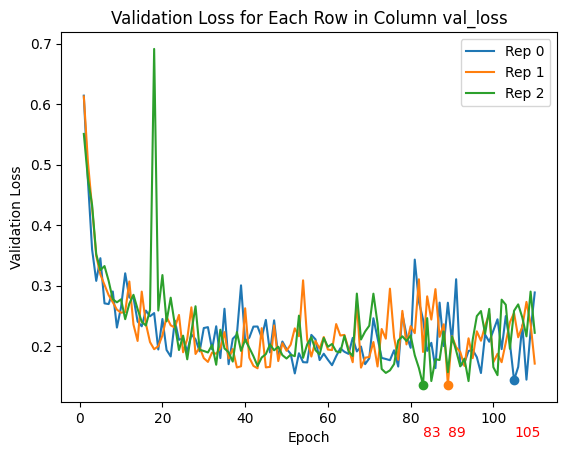

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe called 'filtered_df' with a column named 'val_loss'

# Define the column name
column_name = 'val_loss'

# Iterate over each row in the dataframe
for row_index, row in filtered_df.iterrows():
    # Get the array of values from the current row and column
    values = row[column_name]
    rep_value = int(row['rep'])
    color = plt.get_cmap('tab10')(rep_value % 10)

    # Create an array for the x-axis (epochs)
    epochs = np.arange(1, len(values) + 1)

    # Plot the array of values
    plt.plot(epochs, values, label=f'Rep {rep_value}', color=color)

    # Find the index of the minimum 'val_loss' value
    min_index = np.argmin(values)
    min_loss = round(values[min_index], 2)

    # Annotate the minimum value point on the graph
    plt.annotate(f'{epochs[min_index]}', xy=(epochs[min_index], values[min_index]),
                 xytext=(epochs[min_index], 0.05), fontsize=10, color="red"
                 #arrowprops=dict(facecolor='black', arrowstyle='->')
                 )

    # Add scatter plot markers for the minimum index and minimum loss
    plt.scatter(epochs[min_index], values[min_index], color=color, marker='o')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Each Row in Column {}'.format(column_name))

# Add legend
plt.legend()

# Display the plot
plt.show()


In [121]:
epochs[min_index], values[min_index]-1

(83, -0.8640581369400024)